## Binary Classification using a neural network with Keras
using binary_crossentropy loss in Keras

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

### Load the data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train[0].shape

(28, 28)

In [4]:
x_train[0].max()

255

In [5]:
#reshape
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalize the value of every pixel into the range of 0 to 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'test samples')

60000 training samples
10000 test samples


We choose class-0 and class-1 for binary classification

In [6]:
x_train=x_train[(y_train==0)|(y_train==1)]
y_train=y_train[(y_train==0)|(y_train==1)]
x_test=x_test[(y_test==0)|(y_test==1)]
y_test=y_test[(y_test==0)|(y_test==1)]

In [7]:
x_train.shape

(12665, 784)

In [8]:
x_test.shape

(2115, 784)

create a validation set

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)
print('train:', x_train.shape, y_train.shape)
print('validation:', x_val.shape, y_val.shape)
print('test:', x_test.shape, y_test.shape)

train: (11398, 784) (11398,)
validation: (1267, 784) (1267,)
test: (2115, 784) (2115,)


### Show the digit images

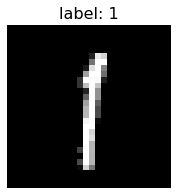

<Figure size 432x288 with 0 Axes>

In [10]:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, x_train.shape[0], 1000):
    I = x_train[n,:].reshape(28,28)
    ax.imshow(I, cmap='gray')
    ax.set_title('label: ' + str(int(y_train[n])), fontsize=16)
    ax.axis('off')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1) 

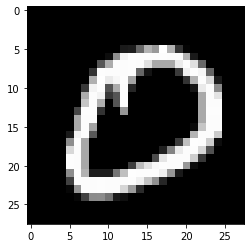

In [11]:
#the first image in the training set
plt.imshow(x_train[0].reshape(28,28), cmap='gray')

In [12]:
#the class label of the first training sample
y_train[0]

0

### Define the MLP model
https://github.com/keras-team/keras/issues/7678 <br>
we do not need to set the parameter "from_logits" for binary_crossentropy

In [13]:
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(784,)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=1,  activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 267,009
Trainable params: 267,009
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [14]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]

### Train the model
https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

In [15]:
for epoch in range(0, 10):   
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_val, y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.extend(history.history['val_accuracy'])
    #save the model to a a HDF5 file 
    model.save('NN_binary_classification_Keras_e'+str(epoch)+'.h5')

epoch 0
179/179 [==============================] - 2s 7ms/step - loss: 0.0521 - accuracy: 0.9824 - val_loss: 0.0056 - val_accuracy: 0.9984
epoch 1
179/179 [==============================] - 1s 7ms/step - loss: 0.0056 - accuracy: 0.9988 - val_loss: 0.0047 - val_accuracy: 0.9984
epoch 2
179/179 [==============================] - 1s 6ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0044 - val_accuracy: 0.9984
epoch 3
179/179 [==============================] - 1s 7ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9992
epoch 4
179/179 [==============================] - 1s 6ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy: 0.9992
epoch 5
179/179 [==============================] - 1s 6ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0040 - val_accuracy: 0.9992
epoch 6
179/179 [==============================] - 1s 7ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0040 - val_accuracy: 0.9984
epoch 7
179/179 [==========

### Plot training histroy: loss vs epoch and accuracy vs epoch

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

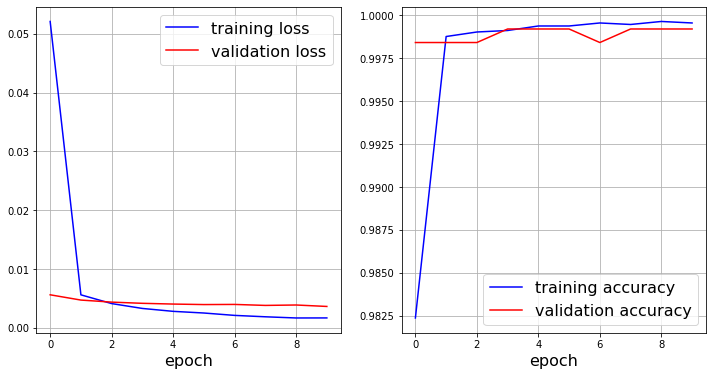

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax[0].plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].plot(np.arange(0,len(acc_train_list)), acc_train_list, '-b', label='training accuracy')
ax[1].plot(np.arange(0,len(acc_val_list)), acc_val_list, '-r', label='validation accuracy')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

after training, we load the best model

In [24]:
np.argmax(acc_val_list)

3

In [25]:
from tensorflow.keras.models import load_model
model = load_model('NN_binary_classification_Keras_e3.h5')

### Test the model

In [26]:
score = model.evaluate(x_test, y_test, batch_size=64, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.002283829730004072
Test accuracy: 0.9990543723106384


### Make Prediction on the test set

In [27]:
y_test_pred=model.predict(x_test, batch_size=64)

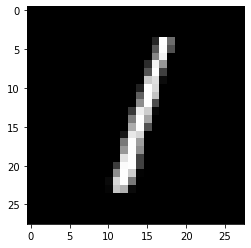

In [28]:
#the first image in the test set
plt.imshow(x_test[0].reshape(28,28), cmap='gray')

In [29]:
y_test_pred[0]

array([0.9996128], dtype=float32)

In [30]:
y_test[0]

1